<a href="https://colab.research.google.com/github/lilianaochoae/VENTAS_FARMACEUTICAS_ATC/blob/main/02.3_SEMANAS_VENTAS_FARMACEUTICAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTACIÓN DE LIBRERÍA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

CARGADE BASE DE DATOS

In [ ]:
columns_dtypes = {'M01AB' : 'category',
                  'M01AE' : 'category',
                  'N02BA' : 'category',
                  'N02BE' : 'category',
                  'N05B' : 'category',
                  'N05C' : 'category',
                  'R03' : 'category',
                  'R06' : 'category'}

In [ ]:
Bd = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT1H-YbYPuoX-I7AGtS5ZtFLe0XyRV15gMzxG1fHFX-J7ZRCRVbwVNJKnwpAfyjvv5CgVNp7CthCcwb/pub?output=csv')

In [ ]:
print (Bd.shape)

(302, 11)


El dataset contiene 50532 observaciones y 13 columnas

PORCENTAJE DE VALORES FALTANTES EN COLUMNAS

In [ ]:
k = Bd.isna().sum()
((round(k[k!=0]/Bd.shape[0], 2) * 100).astype(int)).astype(str).str.cat(['' for i in range(len(k[k!=0]))], sep='%')

Series([], dtype: object)

In [ ]:
base = Bd

LIMPIEZA DE LOS DATOS

In [ ]:
#HotEncoding en la variable dia
dummy_dia = pd.get_dummies(Bd["dia"], prefix = "dia")
dummy_dia.head()

#Agregar el HotEncoding de DIA a la BD
Bd = Bd.drop(["dia"], axis = 1)
Bd = pd.concat([Bd,dummy_dia], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,mes,año,...,dia_22,dia_23,dia_24,dia_25,dia_26,dia_27,dia_28,dia_29,dia_30,dia_31
0,14.00,11.67,44641.0,185.95,41.0,0,32.0,7.0,1,2014,...,0,0,0,0,0,0,0,0,0,0
1,29.33,12.68,37.9,190.70,88.0,5,21.0,44599.0,1,2014,...,0,0,0,0,0,0,0,0,0,0
2,30.67,26.34,45.9,218.40,80.0,8,29.0,12.0,1,2014,...,0,0,0,0,0,0,0,0,0,0
3,34.00,32.37,44712.0,179.60,80.0,8,23.0,10.0,1,2014,...,0,0,0,0,1,0,0,0,0,0
4,31.02,23.35,44762.0,159.88,84.0,12,29.0,12.0,2,2014,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#HotEncoding en la variable mes	
dummy_mes	= pd.get_dummies(Bd["mes"], prefix = "mes")
dummy_mes.head()

#Agregar el HotEncoding de mes a la BD
Bd = Bd.drop(["mes"], axis = 1)
Bd = pd.concat([Bd,dummy_mes], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,año,dia_1,...,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
0,14.00,11.67,44641.0,185.95,41.0,0,32.0,7.0,2014,0,...,0,0,0,0,0,0,0,0,0,0
1,29.33,12.68,37.9,190.70,88.0,5,21.0,44599.0,2014,0,...,0,0,0,0,0,0,0,0,0,0
2,30.67,26.34,45.9,218.40,80.0,8,29.0,12.0,2014,0,...,0,0,0,0,0,0,0,0,0,0
3,34.00,32.37,44712.0,179.60,80.0,8,23.0,10.0,2014,0,...,0,0,0,0,0,0,0,0,0,0
4,31.02,23.35,44762.0,159.88,84.0,12,29.0,12.0,2014,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#HotEncoding en la variable año	
dummy_año	= pd.get_dummies(Bd["año"], prefix = "año")
dummy_año.head()

#Agregar el HotEncoding de mes a la BD
Bd = Bd.drop(["año"], axis = 1)
Bd = pd.concat([Bd,dummy_año], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,dia_1,dia_2,...,mes_9,mes_10,mes_11,mes_12,año_2014,año_2015,año_2016,año_2017,año_2018,año_2019
0,14.00,11.67,44641.0,185.95,41.0,0,32.0,7.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,29.33,12.68,37.9,190.70,88.0,5,21.0,44599.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30.67,26.34,45.9,218.40,80.0,8,29.0,12.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,34.00,32.37,44712.0,179.60,80.0,8,23.0,10.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,31.02,23.35,44762.0,159.88,84.0,12,29.0,12.0,0,1,...,0,0,0,0,1,0,0,0,0,0


VALIDACIÓN DE DATOS

Generalmente, cuando trabajemos con algoritmos de clustering, dado que son algoritmos basados en distancias, va a ser fundamental escalar los datos para prescindir de las unidades de medida de las diferentes features. A continuación, escalamos los datos numéricos:

In [ ]:
from sklearn.preprocessing import scale, MinMaxScaler

# scale
scaled_1 = scale(Bd)

# MinMaxScaler
scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(Bd)

# Muestro las primeras 5 filas escaladas con scale
print("Escalado con scale:")
print(scaled_1[1:6,])

# Muestro las primeras 5 filas escaladas con Min-Max
print("\nEscalado con Min-Max:")
print(scaled_2[1:6,])

Escalado con scale:
[[-0.1290126  -0.11714484 -0.11474584 -0.13808053 -0.14358482 -0.1240713
  -0.13934711 -0.12899733 -0.1850583  -0.1850583  -0.1850583  -0.1850583
  -0.1850583  -0.1850583  -0.1850583  -0.1850583  -0.1850583  -0.1850583
  -0.1850583   5.40370243 -0.1850583  -0.1850583  -0.1850583  -0.1850583
  -0.1850583  -0.1850583  -0.1850583  -0.17526187 -0.1850583  -0.1850583
  -0.1850583  -0.1850583  -0.1850583  -0.1850583  -0.17526187 -0.1850583
  -0.17526187 -0.17526187 -0.1423737   3.25812594 -0.29382126 -0.31333978
  -0.30692491 -0.30692491 -0.30692491 -0.31333978 -0.30692491 -0.30692491
  -0.29382126 -0.28030596 -0.28030596  2.19264505 -0.45607017 -0.45607017
  -0.46135822 -0.45607017 -0.39634344]
 [-0.1290126  -0.1171448  -0.11474582 -0.13808046 -0.14358482 -0.1240713
  -0.1393471  -0.12924675 -0.1850583  -0.1850583  -0.1850583  -0.1850583
  -0.1850583  -0.1850583  -0.1850583  -0.1850583  -0.1850583  -0.1850583
  -0.1850583  -0.1850583  -0.1850583  -0.1850583  -0.1850583  

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


ALGORITMO K-MEANS

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=4, init='random',
    n_init=6, random_state=0
)

In [ ]:
y_km = km.fit_predict(scaled_1)

In [ ]:
print(y_km)

[0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 1
 1 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 1 1 1 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]


GRAFICAR

Para graficar los clústeres, utilizamos Matplotlib. La mejor forma de ver como se comportan los datos es con un gráfico de dispersión (scatter)

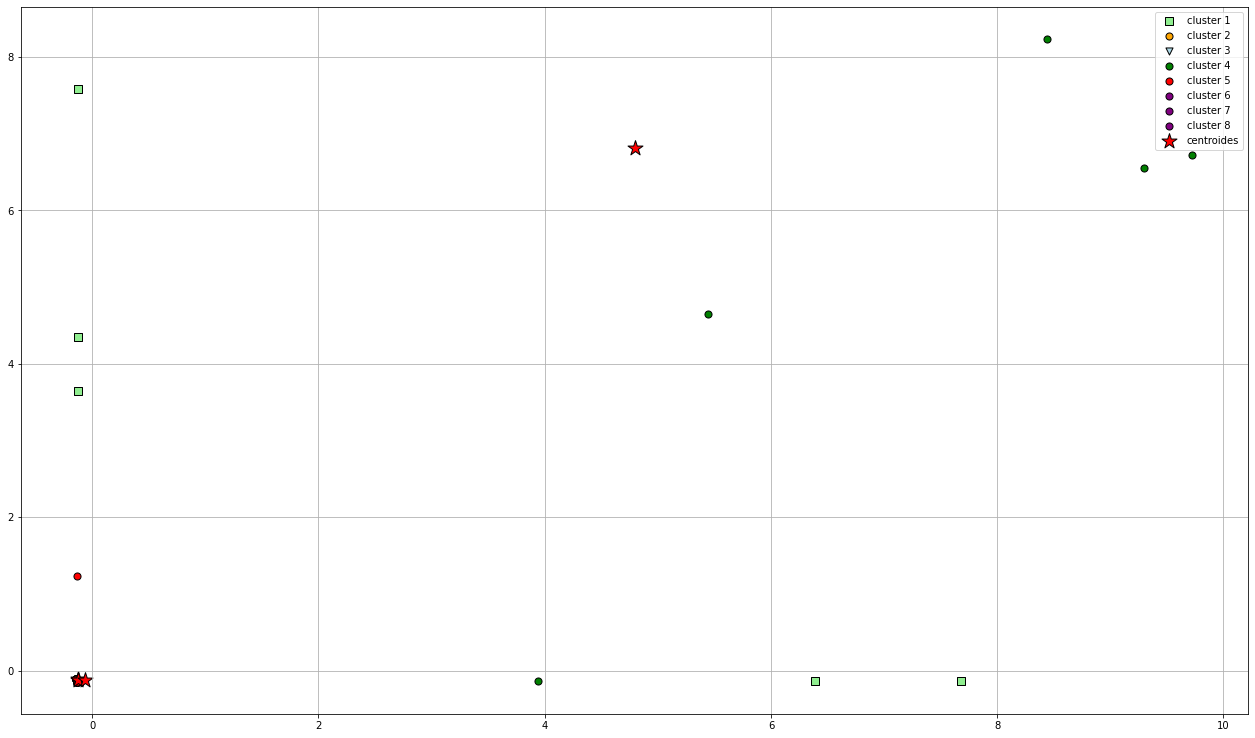

In [ ]:
import matplotlib.pyplot as plt

#configuro el tamaño del grafico final
plt.figure(figsize=(22,13))

#scatter del primer cluster
plt.scatter(
    scaled_1[y_km == 2, 0], scaled_1[y_km == 2, 3],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
#scatter del segundo cluster
plt.scatter(
    scaled_1[y_km == 1, 6], scaled_1[y_km == 1, 2],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
#scatter del tercer cluster
plt.scatter(
    scaled_1[y_km == 4, 7], scaled_1[y_km == 4, 7],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
#scatter del cuarto cluster
plt.scatter(
    scaled_1[y_km == 3, 5], scaled_1[y_km == 3, 6],
    s=50, c='green',
    marker='o', edgecolor='black',
    label='cluster 4'
)
#scatter del quinto cluster
plt.scatter(
    scaled_1[y_km == 1, 3], scaled_1[y_km == 1, 4],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 5'
)
#scatter del sexto cluster
plt.scatter(
    scaled_1[y_km == 4, 6], scaled_1[y_km == 4, 6],
    s=50, c='purple',
    marker='o', edgecolor='black',
    label='cluster 6'
)

#scatter del septimo cluster
plt.scatter(
    scaled_1[y_km == 6, 4], scaled_1[y_km == 4, 6],
    s=50, c='purple',
    marker='o', edgecolor='black',
    label='cluster 7'
)

#scatter del sexto cluster
plt.scatter(
    scaled_1[y_km == 6, 1], scaled_1[y_km == 5, 6],
    s=50, c='purple',
    marker='o', edgecolor='black',
    label='cluster 8'
)


#scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)
#le pongo la leyenda
plt.legend(scatterpoints=1)
#hace una grilla en el grafico
plt.grid()
#lo imprime en pantalla
plt.show()

MÉTRICAS DE EVALUACIÓN


El método de Elbow consiste básicamente en verificar la evolución de la suma de los cuadrados del error para varios valores de K y verificar cual es el que brinda un mejor agrupamiento.

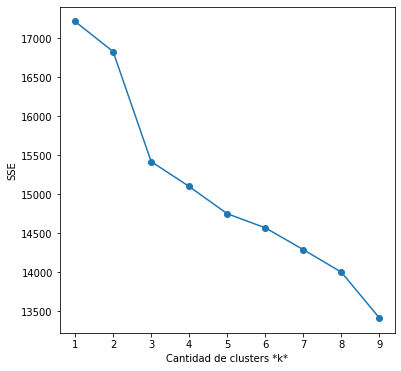

In [ ]:
# Se corre el algoritmo con K entre 2 y 10 y se va guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_1)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE');

In [ ]:
clases = km.labels_

In [ ]:
clases.shape

(302,)

In [ ]:
print(clases)

[5 1 1 1 7 7 7 7 3 3 3 3 3 1 1 1 1 5 5 5 5 1 1 1 1 1 1 1 1 1 2 2 2 2 2 6 6
 6 6 0 0 0 0 1 1 1 1 1 8 8 8 8 1 1 1 1 7 7 7 7 3 3 3 3 3 5 1 1 1 5 5 5 5 5
 1 1 1 1 5 1 1 1 2 2 2 2 2 6 6 6 6 0 0 0 0 1 1 1 1 1 8 8 8 8 1 1 1 1 1 7 7
 7 7 3 3 3 3 1 1 1 1 5 5 5 5 5 5 1 1 1 1 1 1 1 1 2 2 2 2 6 6 6 6 0 0 0 0 0
 1 1 1 1 8 8 8 8 1 4 4 4 4 4 7 7 7 3 3 3 3 1 1 1 1 1 5 5 5 5 1 1 1 1 1 1 1
 1 1 2 2 2 2 6 6 6 6 0 0 0 0 0 5 1 1 1 8 8 8 8 8 1 1 1 1 7 7 7 7 3 3 3 3 1
 1 1 1 1 5 5 5 5 1 1 1 1 1 1 1 1 1 2 2 2 2 6 6 6 6 6 0 0 0 0 1 1 1 1 8 8 8
 8 8 1 1 1 1 7 7 7 7 3 3 3 3 3 1 1 1 1 5 5 5 5 1 1 1 1 1 1 1 1 1 2 2 2 2 6
 6 6 6 6 0 0]


ALGORITMO DE CLASIFICACIÓN

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
datos_Bd_variables = Bd

In [ ]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(datos_Bd_variables, clases, random_state=1)

In [ ]:
print("Tamaño de los datos de entrenamiento = ", X_entrenamiento.shape)
print("Tamaño de los datos de prueba = ", X_prueba.shape)
print("Tamaño del vector de clases de entrenamiento = " , y_entrenamiento.shape)
print("Tamaño del vector de clases de prueba = ", y_prueba.shape)

Tamaño de los datos de entrenamiento =  (226, 57)
Tamaño de los datos de prueba =  (76, 57)
Tamaño del vector de clases de entrenamiento =  (226,)
Tamaño del vector de clases de prueba =  (76,)


In [ ]:
# Cargar librerias
from sklearn.ensemble import AdaBoostClassifier
# Importar Clasificador de Vector de Soporte
from sklearn.svm import SVC
# Importar métricas scikit-learn para calculos exactos
from sklearn import metrics

In [ ]:
# Crear clasificador base
svc = SVC(probability=True, kernel='linear')

# Crear objeto de clasificación AdaBoost
abc = AdaBoostClassifier(n_estimators=2500,learning_rate=0.001)

# Clasificador de entrenamiento AdaBoost
model = abc.fit(X_entrenamiento, y_entrenamiento)

# Predicción de la respuesta para la bd de prueba
y_pred = model.predict(X_prueba)

# Exactitud del modelo, qué tan correcto es el clasificador?
print("Accuracy:",metrics.accuracy_score(y_prueba, y_pred))

Accuracy: 0.9473684210526315
